# Analysis

## Setup

In [1]:
#!pip install numpy pandas

In [2]:
#!pip install geopandas folium

## Code

In [3]:
# Start writing code here...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

/home/jupyterhubtest/anaconda3/envs/dsfc7/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


### Data Loading

In [6]:
# Create the 6 data frames per csv file (Upload the CSV files first!)
rooms = pd.read_csv("./work/Rooms data.csv")
schools_loc = pd.read_csv("./work/Schools Location Data.csv")
teachers = pd.read_csv("./work/Teachers data.csv")
mooe = pd.read_csv("./work/MOOE data.csv")
masterlist= pd.read_csv("./work/Masterlist of Schools.csv")
enrol_e = pd.read_csv("./work/Enrollment Master Data_2015_E.csv")
enrol_s = pd.read_csv("./work/Enrollment Master Data_2015_S.csv")

region_stats = pd.read_csv("./work/regional_stats.csv")

### Rooms 

In [7]:
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46412 entries, 0 to 46411
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School ID                   46412 non-null  int64  
 1   rooms.standard.academic     46412 non-null  int64  
 2   rooms.standard.unused       46412 non-null  int64  
 3   rooms.nonstandard.academic  46408 non-null  float64
 4   rooms.nonstandard.unused    46408 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.8 MB


In [8]:
rooms.isnull().sum()

School ID                     0
rooms.standard.academic       0
rooms.standard.unused         0
rooms.nonstandard.academic    4
rooms.nonstandard.unused      4
dtype: int64

In [9]:
rooms.head()

,School ID,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused
0,101746,15,0,0.0,0.0
1,102193,13,3,0.0,0.0
2,101283,7,0,0.0,0.0
3,100216,6,0,0.0,0.0
4,100043,9,0,0.0,0.0


### Schools Location

In [10]:
schools_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46624 entries, 0 to 46623
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   School ID          46624 non-null  int64  
 1   School Name        46624 non-null  object 
 2   Region             46624 non-null  object 
 3   Province           46624 non-null  object 
 4   Municipality       46624 non-null  object 
 5   Division           46624 non-null  object 
 6   District           46624 non-null  object 
 7   Offering           46624 non-null  object 
 8   Name of Principal  46613 non-null  object 
 9   Enrolment          46624 non-null  int64  
 10  Latitude           46621 non-null  float64
 11  Longitude          46621 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 4.3+ MB


In [11]:
schools_loc.isnull().sum()

School ID             0
School Name           0
Region                0
Province              0
Municipality          0
Division              0
District              0
Offering              0
Name of Principal    11
Enrolment             0
Latitude              3
Longitude             3
dtype: int64

In [12]:
schools_loc.head()

,School ID,School Name,Region,Province,Municipality,Division,District,Offering,Name of Principal,Enrolment,Latitude,Longitude
0,100001,Apaleng-Libtong ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Jesusa G. Laeno,90,18.253666,120.606180
1,100002,Bacarra CES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Gene A. Reginaldo,456,18.250964,120.608958
2,100003,Buyon ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Imelda C. Ilay,167,18.234599,120.616037
3,100004,Ganagan Elementary School,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Pedestrelyn Aurora R. Acoba,122,18.250014,120.587169
4,100005,Macupit ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Venchito F. Galario,77,18.293994,120.641019


### Teachers

In [13]:
teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45040 entries, 0 to 45039
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   school.id            45040 non-null  int64
 1   teachers.instructor  45040 non-null  int64
 2   teachers.mobile      45040 non-null  int64
 3   teachers.regular     45040 non-null  int64
 4   teachers.sped        45040 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


In [14]:
teachers.isnull().sum()

school.id              0
teachers.instructor    0
teachers.mobile        0
teachers.regular       0
teachers.sped          0
dtype: int64

In [15]:
teachers.head()

,school.id,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped
0,100001,0,0,2,0
1,100002,0,6,11,0
2,100003,0,1,6,0
3,100004,0,1,6,0
4,100005,0,1,6,0


### MOOE

In [16]:
mooe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44028 entries, 0 to 44027
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school.id          44028 non-null  int64 
 1   school.name        44028 non-null  object
 2   school.enrollment  44028 non-null  int64 
 3   school.offering    44028 non-null  object
 4    school.mooe       44028 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


In [17]:
mooe.isnull().sum()

school.id            0
school.name          0
school.enrollment    0
school.offering      0
 school.mooe         0
dtype: int64

In [18]:
mooe.head()

,school.id,school.name,school.enrollment,school.offering,school.mooe
0,305075,Abra HS,2481,Secondary,"2,182,000.00"
1,134966,Agtangao ES,376,Elementary,"227,000.00"
2,134967,Bacsil ES,218,Elementary,"144,000.00"
3,134968,Bangued East CS,443,Elementary,"339,000.00"
4,134969,Bangued North ES,307,Elementary,"178,000.00"


### Masterlist

In [19]:
masterlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46603 entries, 0 to 46602
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school.id               46603 non-null  int64  
 1   school.name             46603 non-null  object 
 2   school.region           46603 non-null  object 
 3   school.region.name      46603 non-null  object 
 4   school.province         46603 non-null  object 
 5   school.cityhall         46602 non-null  object 
 6   school.division         46603 non-null  object 
 7   school.citymuni         46603 non-null  object 
 8   school.district         46603 non-null  object 
 9   school.legdistrict      46603 non-null  object 
 10  school.type             46603 non-null  object 
 11  school.abbrev           18167 non-null  object 
 12  school.previousname     42221 non-null  object 
 13  school.mother.id        46596 non-null  float64
 14  school.address          44621 non-null

In [20]:
masterlist.isnull().sum()

school.id                     0
school.name                   0
school.region                 0
school.region.name            0
school.province               0
school.cityhall               1
school.division               0
school.citymuni               0
school.district               0
school.legdistrict            0
school.type                   0
school.abbrev             28436
school.previousname        4382
school.mother.id              7
school.address             1982
school.established            9
school.classification         0
school.classification2        0
school.curricularclass        0
school.organization           0
school.cityincome           976
school.cityclass          38390
school.urban                  3
dtype: int64

In [21]:
masterlist.head()

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,101746.0,"Brgy. Dias Bautista, Pang",1/1/1930,Elementary,DepED Managed,Elementary,Monograde,P 25 M or more but less than P 35 M,NaN,Partially Urban
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,102193.0,A.G. Tupaz,1/1/1944,Elementary,DepED Managed,Kinder & Elementary,Monograde,P 240 M or more but less than P 320 M,Component City,Partially Urban
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,101283.0,-,1/1/1945,Elementary,DepED Managed,Elementary,Monograde,P 55 M or more,NaN,Partially Urban
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,100216.0,Sucsuquen,1/1/1964,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,100043.0,None,1/1/1979,Elementary,DepED Managed,Elementary,Monograde,P 25 M or more but less than P 35 M,NaN,Partially Urban


### Enrollment 2015 Elementary

In [22]:
enrol_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38649 entries, 0 to 38648
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   School ID       38648 non-null  float64
 1   Kinder Male     38648 non-null  float64
 2   Kinder Female   38648 non-null  float64
 3   Grade 1 Male    38648 non-null  float64
 4   Grade 1 Female  38648 non-null  float64
 5   Grade 2 Male    38648 non-null  float64
 6   Grade 2 Female  38648 non-null  float64
 7   Grade 3 Male    38648 non-null  float64
 8   Grade 3 Female  38648 non-null  float64
 9   Grade 4 Male    38648 non-null  float64
 10  Grade 4 Female  38648 non-null  float64
 11  Grade 5 Male    38648 non-null  float64
 12  Grade 5 Female  38648 non-null  float64
 13  Grade 6 Male    38648 non-null  float64
 14  Grade 6 Female  38648 non-null  float64
 15  SPED NG Male    38648 non-null  float64
 16  SPED NG Female  38648 non-null  float64
dtypes: float64(17)
memory usage: 5.

In [23]:
enrol_e.isnull().sum()

School ID         1
Kinder Male       1
Kinder Female     1
Grade 1 Male      1
Grade 1 Female    1
Grade 2 Male      1
Grade 2 Female    1
Grade 3 Male      1
Grade 3 Female    1
Grade 4 Male      1
Grade 4 Female    1
Grade 5 Male      1
Grade 5 Female    1
Grade 6 Male      1
Grade 6 Female    1
SPED NG Male      1
SPED NG Female    1
dtype: int64

In [24]:
enrol_e.head()

,School ID,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female
0,100001.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0
1,100002.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0
2,100003.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0
3,100004.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0
4,100005.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0


### Enrollment 2015 Secondary

In [25]:
enrol_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7977 entries, 0 to 7976
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   School ID        7976 non-null   float64
 1   Grade 7 Male     7976 non-null   object 
 2   Grade 7 Female   7976 non-null   object 
 3   Grade 8 Male     7976 non-null   object 
 4   Grade 8 Female   7976 non-null   object 
 5   Grade 9 Male     7976 non-null   object 
 6   Grade 9 Female   7976 non-null   object 
 7   Grade 10 Male    7976 non-null   object 
 8   Grade 10 Female  7976 non-null   object 
 9   Grade 11 Male    7976 non-null   float64
 10  Grade 11 Female  7976 non-null   float64
 11  Grade 12 Male    7976 non-null   float64
 12  Grade 12 Female  7976 non-null   float64
 13  SPED NG Male     7976 non-null   float64
 14  SPED NG Female   7976 non-null   float64
dtypes: float64(7), object(8)
memory usage: 934.9+ KB


In [26]:
enrol_s.isnull().sum()

School ID          1
Grade 7 Male       1
Grade 7 Female     1
Grade 8 Male       1
Grade 8 Female     1
Grade 9 Male       1
Grade 9 Female     1
Grade 10 Male      1
Grade 10 Female    1
Grade 11 Male      1
Grade 11 Female    1
Grade 12 Male      1
Grade 12 Female    1
SPED NG Male       1
SPED NG Female     1
dtype: int64

In [27]:
enrol_s.head()

,School ID,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female
0,300001.0,20,12,13,17,10,15,17,14,0.0,0.0,0.0,0.0,0.0,0.0
1,300002.0,240,288,229,258,225,231,261,207,0.0,0.0,0.0,0.0,0.0,0.0
2,300003.0,89,84,78,88,65,76,54,79,0.0,0.0,0.0,0.0,0.0,0.0
3,300004.0,38,47,47,54,39,42,52,45,0.0,0.0,0.0,0.0,0.0,0.0
4,300005.0,78,70,60,61,68,64,53,50,0.0,0.0,0.0,0.0,0.0,0.0


### Regional Stats

In [28]:
region_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   REGION                               17 non-null     object 
 1   REGION_NAME                          17 non-null     object 
 2   NET_ENROLMENT_ELEMENTARY             17 non-null     float64
 3   NET_PARTICIPATION_SECONDARY SCHOOLS  17 non-null     float64
 4   COHORT_SURVIVAL_ELEMENTARY           17 non-null     float64
 5   COHORT_SURVIVAL_SECONDARY            17 non-null     float64
 6   GROSS_ENROLLMENT_PRIMARY             17 non-null     int64  
 7   TEACHER_PRIMARY                      17 non-null     int64  
 8   GROSS_ENROLLMENT_SECONDARY           17 non-null     int64  
 9   TEACHER_SECONDARY                    17 non-null     int64  
 10  NAT_MATH_PRIMARY                     17 non-null     float64
 11  NAT_ENGLISH_PRIMARY               

In [29]:
region_stats.isnull().sum()

REGION                                 0
REGION_NAME                            0
NET_ENROLMENT_ELEMENTARY               0
NET_PARTICIPATION_SECONDARY SCHOOLS    0
COHORT_SURVIVAL_ELEMENTARY             0
COHORT_SURVIVAL_SECONDARY              0
GROSS_ENROLLMENT_PRIMARY               0
TEACHER_PRIMARY                        0
GROSS_ENROLLMENT_SECONDARY             0
TEACHER_SECONDARY                      0
NAT_MATH_PRIMARY                       0
NAT_ENGLISH_PRIMARY                    0
NAT_SCIENCE_PRIMARY                    0
NAT_MATH_SECONDARY                     0
NAT_ENGLISH_SECONDARY                  0
NAT_SCIENCE_SECONDARY                  0
TEXTBOOKS_DISTRIBUTED                  0
SIMPLE_LITERACY                        0
FUNCTIONAL_LITERACY                    0
dtype: int64

In [30]:
region_stats.head()

,REGION,REGION_NAME,NET_ENROLMENT_ELEMENTARY,NET_PARTICIPATION_SECONDARY SCHOOLS,COHORT_SURVIVAL_ELEMENTARY,COHORT_SURVIVAL_SECONDARY,GROSS_ENROLLMENT_PRIMARY,TEACHER_PRIMARY,GROSS_ENROLLMENT_SECONDARY,TEACHER_SECONDARY,NAT_MATH_PRIMARY,NAT_ENGLISH_PRIMARY,NAT_SCIENCE_PRIMARY,NAT_MATH_SECONDARY,NAT_ENGLISH_SECONDARY,NAT_SCIENCE_SECONDARY,TEXTBOOKS_DISTRIBUTED,SIMPLE_LITERACY,FUNCTIONAL_LITERACY
0,NCR,National Capital Region,90.15,77.76,85.62,81.67,1231890,31314,672462,19210,56.01,56.29,51.67,37.59,47.19,36.10,715872,99.2,94.0
1,CAR,Cordillera Administrative,99.81,62.70,75.03,78.39,217442,7848,86817,2967,63.73,61.67,53.56,39.92,48.70,38.34,92260,94.8,89.2
2,I,Ilocos Region,93.81,72.67,83.60,83.58,618666,21604,304807,9032,70.77,66.36,62.00,40.36,44.30,37.11,323011,98.2,91.3
3,II,Cagayan Valley,95.12,68.25,78.76,81.49,423776,14728,195048,5855,69.44,63.49,59.11,40.27,43.33,37.18,212798,95.0,86.1
4,III,Central Luzon,90.55,70.22,82.11,81.62,1287192,34952,583896,14534,70.14,67.33,63.06,41.29,45.08,38.57,609378,97.8,92.1


In [31]:
region_stats.columns

Index(['REGION', 'REGION_NAME', 'NET_ENROLMENT_ELEMENTARY',
       'NET_PARTICIPATION_SECONDARY SCHOOLS', 'COHORT_SURVIVAL_ELEMENTARY',
       'COHORT_SURVIVAL_SECONDARY', 'GROSS_ENROLLMENT_PRIMARY',
       'TEACHER_PRIMARY', 'GROSS_ENROLLMENT_SECONDARY', 'TEACHER_SECONDARY',
       'NAT_MATH_PRIMARY', 'NAT_ENGLISH_PRIMARY', 'NAT_SCIENCE_PRIMARY',
       'NAT_MATH_SECONDARY', 'NAT_ENGLISH_SECONDARY', 'NAT_SCIENCE_SECONDARY',
       'TEXTBOOKS_DISTRIBUTED', 'SIMPLE_LITERACY', 'FUNCTIONAL_LITERACY'],
      dtype='object')

In [32]:
grade_level = region_stats.groupby("REGION")["COHORT_SURVIVAL_ELEMENTARY"].min()
grade_level

REGION
ARMM    40.69
CAR     75.03
I       83.60
II      78.76
III     82.11
IV-A    84.00
IV-B    74.68
IX      60.93
NCR     85.62
V       76.62
VI      73.59
VII     80.33
VIII    73.61
X       67.92
XI      66.23
XII     65.03
XIII    72.87
Name: COHORT_SURVIVAL_ELEMENTARY, dtype: float64

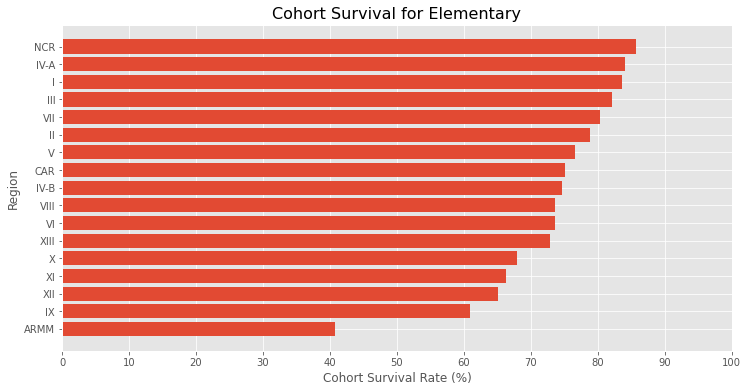

In [33]:
reg_elem = region_stats.groupby("REGION")["COHORT_SURVIVAL_ELEMENTARY"].min().sort_values()

plt.figure(figsize=(12,6)) 

plt.barh(reg_elem.index, reg_elem.values) 
plt.title("Cohort Survival for Elementary", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Cohort Survival Rate (%)", fontsize=12)
plt.xticks(range(0,101,10))
plt.show()


In [34]:
reg_elem_sum = sum(region_stats.groupby("REGION")["COHORT_SURVIVAL_ELEMENTARY"].min())
reg_elem_count= region_stats["REGION"].nunique()
reg_elem_ave= reg_elem_sum/reg_elem_count
reg_elem_ave

73.03647058823529

In [35]:
HS_level = region_stats.groupby("REGION")["COHORT_SURVIVAL_SECONDARY"].min()
HS_level

REGION
ARMM    68.50
CAR     78.39
I       83.58
II      81.49
III     81.62
IV-A    83.82
IV-B    74.40
IX      73.08
NCR     81.67
V       76.94
VI      79.90
VII     79.49
VIII    73.13
X       84.08
XI      75.30
XII     76.77
XIII    74.60
Name: COHORT_SURVIVAL_SECONDARY, dtype: float64

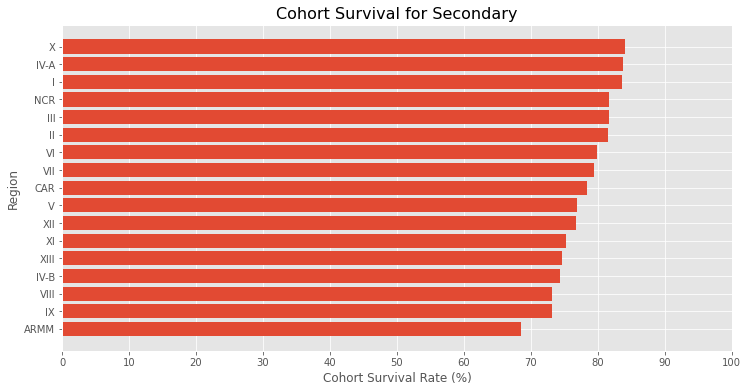

In [36]:
reg_hs = region_stats.groupby("REGION")["COHORT_SURVIVAL_SECONDARY"].min().sort_values()

plt.figure(figsize=(12,6)) 

plt.barh(reg_hs.index, reg_hs.values) 
plt.title("Cohort Survival for Secondary", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Cohort Survival Rate (%)", fontsize=12)
plt.xticks(range(0,101,10))
plt.show()

In [37]:
x = sum(region_stats.groupby("REGION")["COHORT_SURVIVAL_SECONDARY"].min())
y = region_stats["REGION"].nunique()
reg_hs_ave= x/y
reg_hs_ave

78.04470588235293

In [39]:
#df_all.head()

## Highlights


Highlight: --ARMM
Demographics, resources, budget
Enrollees vs # of School
Teacher vs Student (st_ratio)
enrollee vs school ratio (es_ratio)
MOOE -- NO MOOE if ARMM
NAT performance comparison


In [40]:
## Code here ARMM

In [41]:
# Demographics (Male vs. Female)


In [42]:
#NAT Performance Comparison

In [43]:
# Resources
resources_df = all_data[['school.region','rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped']]

resources_df["total_facilities"] = resources_df["rooms.standard.academic"] + resources_df["rooms.nonstandard.academic"] + resources_df['rooms.standard.unused'] + resources_df['rooms.nonstandard.unused']
resources_df["total_teachers"] = resources_df['teachers.instructor'] + resources_df['teachers.mobile'] + resources_df['teachers.regular'] + resources_df['teachers.sped']

NameError: name 'all_data' is not defined

In [44]:
res_ncr_armm = resources_df[(resources_df["school.region"] == "NCR") | (resources_df["school.region"] == "ARMM")]

NameError: name 'resources_df' is not defined

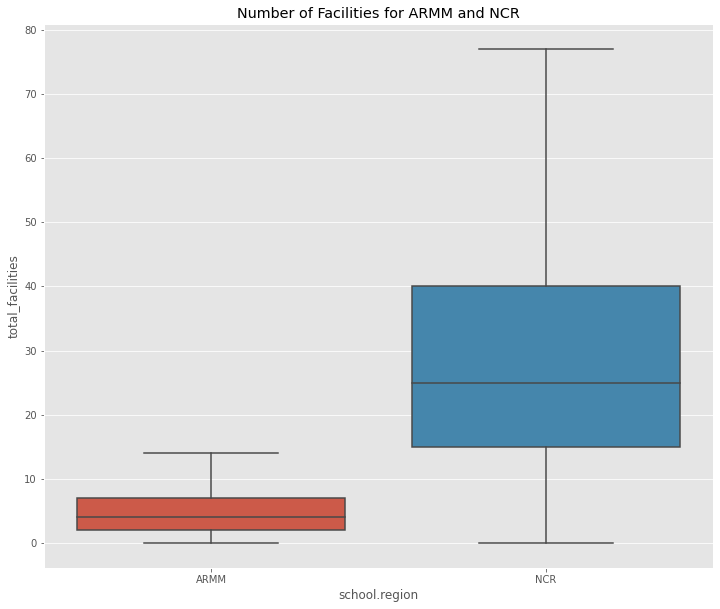

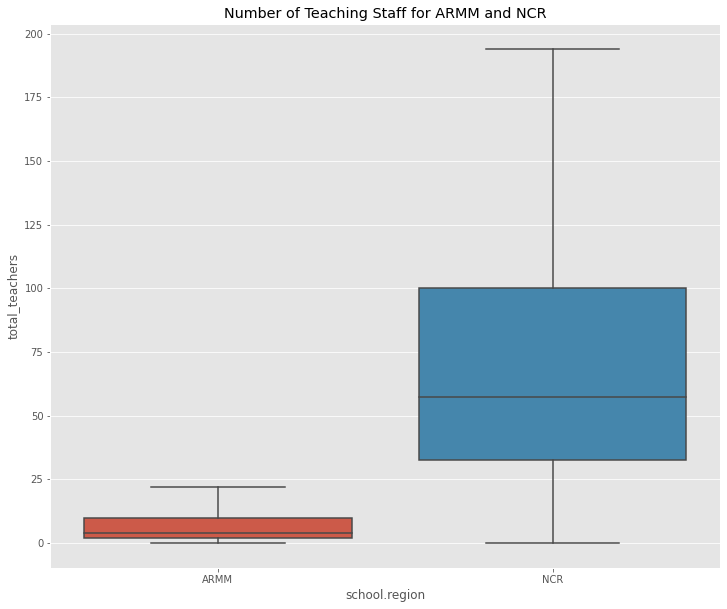

In [ ]:
plt.figure(figsize=(12,10)) # figsize

sns.boxplot(x="school.region", y="total_facilities", data=res_ncr_armm, showfliers = False)
plt.title("Number of Facilities for ARMM and NCR")

plt.show()

plt.figure(figsize=(12,10)) # figsize

sns.boxplot(x="school.region", y="total_teachers", data=res_ncr_armm, showfliers = False)
plt.title("Number of Teaching Staff for ARMM and NCR")

plt.show()

In [ ]:
# Enrollees vs # of School

In [ ]:
# Teacher vs Students (st_ratio)

## Data Prep

In [ ]:
# Take note of the final shape of your dataframe -- it's possible that some of the rows will be eliminated bc they're not present (unique ids doesnt match)
# I suggest you guys use the master list as the main reference
# Create the master Data frame now
# Dataframes needed - Masterlist, Enrolment Master Elementary, MOOE, Rooms, Teachers

In [ ]:
#masterlist, mooe, teachers - school.id
#enrol_e, rooms - School ID
#save the merge to a dataframe then use that to merge with another df (keep the lines of code para may record kayo ng minemerge niyo)
all_data = pd.merge(masterlist, enrol_e, left_on = "school.id", right_on = "School ID", how = "left") 

In [ ]:
all_data.shape

(46603, 40)

In [ ]:
all_data = pd.merge(all_data, rooms, left_on = "school.id", right_on = "School ID", how = "left") 

In [ ]:
all_data.shape

(46603, 45)

In [ ]:
all_data = pd.merge(all_data, teachers, on = "school.id", how = "left")

In [ ]:
all_data.shape

(46603, 49)

In [ ]:
all_data.describe()

,school.id,school.mother.id,School ID_x,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,...,School ID_y,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,sum_e
count,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,...,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000,46603.000000
mean,154257.992104,153756.836920,101950.095316,19.941549,18.939789,25.724395,23.149583,25.737807,22.884986,28.556531,...,152829.911014,8.747398,0.149025,0.237174,0.003197,0.002339,0.936120,10.760209,0.044225,305.279767
std,71787.948453,71401.250902,50439.043447,30.755555,29.736238,45.123873,41.118313,44.212114,40.263313,47.718683,...,71922.393140,9.821979,0.702342,1.125065,0.080036,0.102619,2.562069,17.048881,0.711174,519.866864
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111769.500000,111664.500000,103686.500000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,6.000000,...,111522.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,67.000000
50%,123537.000000,123403.000000,115493.000000,12.000000,11.000000,14.000000,13.000000,14.000000,13.000000,16.000000,...,123289.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,175.000000
75%,135606.500000,135422.000000,127277.500000,23.000000,22.000000,28.000000,25.000000,29.000000,25.000000,32.000000,...,135355.500000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,335.000000
max,900279.000000,900279.000000,262502.000000,617.000000,597.000000,912.000000,822.000000,868.000000,791.000000,883.000000,...,356059.000000,187.000000,15.000000,74.000000,7.000000,10.000000,104.000000,472.000000,89.000000,10037.000000


In [ ]:
# Replace all NaN values with 0 and make sure the columns you'll use is numeric (data type)
all_data = all_data.fillna(0)

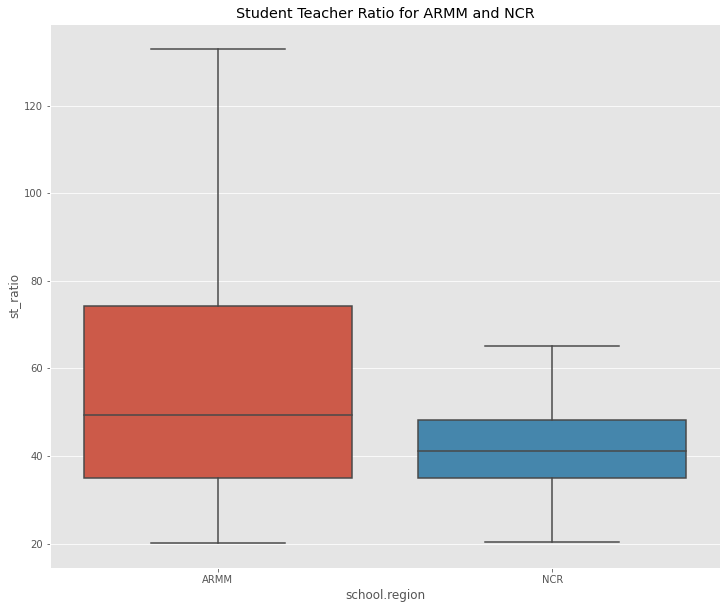

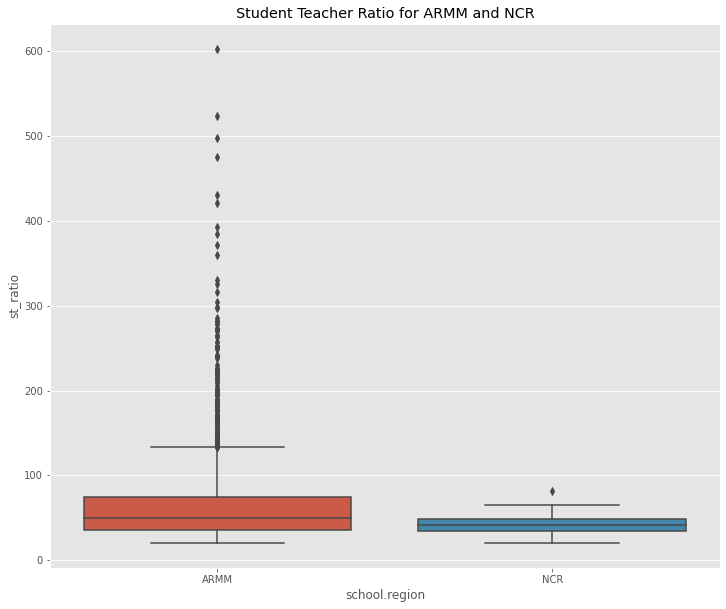

In [ ]:
# Feature Engineering Section
#1. Total number of elementary students   sum_e
#2. Total number of Male elementary students  male_e
#3. Total number of Female elementary students female_e
#4. Total number of Teachers sum_teacher
#5. number of Students to 1 teacher st_ratio
#6. Other ratios you guys want to have 

#summing number of Primary Students
all_data["sum_e"] = all_data["Kinder Male"]+all_data["Kinder Female"]+all_data["Grade 1 Male"]+all_data["Grade 1 Female"]+all_data["Grade 2 Male"]+all_data["Grade 2 Female"]+all_data["Grade 3 Male"]+all_data["Grade 3 Female"]+all_data["Grade 4 Female"]+all_data["Grade 4 Male"]+all_data["Grade 6 Male"]+all_data["Grade 5 Male"]+all_data["Grade 5 Female"]+all_data["Grade 6 Female"]+all_data["SPED NG Male"]+all_data["SPED NG Female"]
all_data["male_e"] = all_data["Kinder Male"]+all_data["Grade 1 Male"]+all_data["Grade 2 Male"]+all_data["Grade 3 Male"]+all_data["Grade 4 Male"]+all_data["Grade 5 Male"]+all_data["Grade 6 Male"]+all_data["SPED NG Male"]
all_data["female_e"] = all_data["Kinder Female"]+all_data["Grade 1 Female"]+all_data["Grade 2 Female"]+all_data["Grade 3 Female"]+all_data["Grade 4 Female"]+all_data["Grade 5 Female"]+all_data["Grade 6 Female"]+all_data["SPED NG Female"]
all_data["sum_teacher"] = all_data["teachers.instructor"]+all_data["teachers.mobile"]+all_data["teachers.regular"]+all_data["teachers.sped"]
all_data["st_ratio"] = all_data["sum_e"]/all_data["sum_teacher"]
all_data["st_ratio"]


#Slices only the region and ratio data
nc_ar_ratio = all_data[["school.region", "st_ratio"]]
#Sliced only ARMM and NCR regions
nc_ar_ratio = nc_ar_ratio[(nc_ar_ratio["school.region"] == "NCR") | (nc_ar_ratio["school.region"] == "ARMM")]

nc_ar_ratio = nc_ar_ratio[(nc_ar_ratio["st_ratio"] > 20) & (nc_ar_ratio["st_ratio"] < 100000)]



plt.figure(figsize=(12,10)) # figsize

sns.boxplot(x="school.region", y="st_ratio", data=nc_ar_ratio, showfliers = False)
plt.title("Student Teacher Ratio for ARMM and NCR")

plt.show()

# you add the showfliers = False parameter



plt.figure(figsize=(12,10)) # figsize

sns.boxplot(x="school.region", y="st_ratio", data=nc_ar_ratio, showfliers = True)
plt.title("Student Teacher Ratio for ARMM and NCR")

plt.show()

# you add the showfliers = False parameter




In [ ]:
nc_ar_ratio.head()

,school.region,st_ratio
34437,ARMM,30.500000
34438,ARMM,37.333333
34441,ARMM,29.666667
34442,ARMM,47.250000
34443,ARMM,80.666667


In [ ]:
nc_ar_ratio[nc_ar_ratio["school.region"] == "ARMM"].sort_values(ascending = False, by = "st_ratio")
#Highest st_ratio in NCR: 82.02, 65.13, 64.37
#Highest st_ratio in ARMM: 603, 523.15, 498

,school.region,st_ratio
36227,ARMM,603.000000
34957,ARMM,523.500000
35445,ARMM,498.000000
35947,ARMM,476.000000
36228,ARMM,431.000000
...,...,...
34663,ARMM,20.555556
35464,ARMM,20.500000
36607,ARMM,20.250000
35647,ARMM,20.250000


In [ ]:
all_data["school.region.name"].unique()'
'

array(['Region I', 'Region II', 'Region III', 'Region IV-A',
       'Region IV-B', 'Region V', 'Region VI', 'Region VII',
       'Region VIII', 'Region IX', 'Region X', 'Region XI', 'Region XII',
       'CARAGA', 'ARMM', 'CAR', 'NCR'], dtype=object)

In [ ]:
all_data.head()

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,SPED NG Female,School ID_y,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,0.0,101746.0,15.0,0.0,0.0,0.0,0.0,1.0,20.0,0.0
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,22.0,102193.0,13.0,3.0,0.0,0.0,0.0,2.0,12.0,4.0
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,0.0,101283.0,7.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,0.0,100216.0,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,0.0,100043.0,9.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0


In [ ]:
all_data.columns

Index(['school.id', 'school.name', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'School ID_x', 'Kinder Male',
       'Kinder Female', 'Grade 1 Male', 'Grade 1 Female', 'Grade 2 Male',
       'Grade 2 Female', 'Grade 3 Male', 'Grade 3 Female', 'Grade 4 Male',
       'Grade 4 Female', 'Grade 5 Male', 'Grade 5 Female', 'Grade 6 Male',
       'Grade 6 Female', 'SPED NG Male', 'SPED NG Female', 'School ID_y',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teach

In [ ]:
ncr_schools = all_data[all_data["school.region"] == "NCR"]
armm_schools = all_data[all_data["school.region"] == "ARMM"]

In [ ]:
armm_schools.shape

(2514, 49)

In [ ]:
ncr_schools.head(5)

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,sum_e,male_e,female_e,sum_teacher,st_ratio
38172,136566,15th Avenue Elementary School,NCR,National Capital Region,NCR SECOND DISTRICT,QUEZON CITY,Quezon City,QUEZON CITY,School District XI,3rd District,...,0.0,0.0,3.0,13.0,0.0,559.0,293.0,266.0,16.0,34.937500
38173,136602,A. Bonifacio ES,NCR,National Capital Region,NCR FOURTH DISTRICT,PASAY CITY,Pasay City,PASAY CITY,Pasay City West District,Lone District,...,0.0,0.0,7.0,36.0,0.0,1486.0,758.0,728.0,43.0,34.558140
38174,136418,A. C. Herrera Elementary School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT",TONDO,Manila,TONDO,Tondo I,2nd District,...,0.0,0.0,6.0,39.0,0.0,946.0,481.0,465.0,45.0,21.022222
38175,136800,A. Deato ES,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City North District,1st District,...,0.0,0.0,1.0,19.0,0.0,1049.0,555.0,494.0,20.0,52.450000
38176,136801,A. Fernando ES,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City North District,1st District,...,0.0,0.0,5.0,40.0,0.0,2422.0,1299.0,1123.0,45.0,53.822222


In [ ]:
armm_schools.head(3)

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,sum_e,male_e,female_e,sum_teacher,st_ratio
34437,133504,77Th PC ES,ARMM,Autonomous Region in Muslim Mindanao,LANAO DEL SUR,LANAO DEL SUR,Lanao del Sur - IB,TARAKA,Taraka II,1st District,...,0.0,0.0,1.0,9.0,0.0,305.0,133.0,172.0,10.0,30.500000
34438,133212,Abaga PS,ARMM,Autonomous Region in Muslim Mindanao,LANAO DEL SUR,LANAO DEL SUR,Lanao del Sur - IB,BALINDONG (WATU),Balindong I,1st District,...,0.0,0.0,0.0,6.0,0.0,224.0,111.0,113.0,6.0,37.333333
34439,217054,Abbas Abdulla Primary School,ARMM,Autonomous Region in Muslim Mindanao,SULU,SULU,Sulu I,INDANAN,Talipao,1st District,...,0.0,0.0,0.0,0.0,0.0,25.0,10.0,15.0,0.0,inf


## Graphs

### Region Stats

In [ ]:
# Try to make a viz that can highlight cohort survival rates :D
# Tip: use seaborn, any data viz will do, up to u guys



,REGION,REGION_NAME,NET_ENROLMENT_ELEMENTARY,NET_PARTICIPATION_SECONDARY SCHOOLS,COHORT_SURVIVAL_ELEMENTARY,COHORT_SURVIVAL_SECONDARY,GROSS_ENROLLMENT_PRIMARY,TEACHER_PRIMARY,GROSS_ENROLLMENT_SECONDARY,TEACHER_SECONDARY,NAT_MATH_PRIMARY,NAT_ENGLISH_PRIMARY,NAT_SCIENCE_PRIMARY,NAT_MATH_SECONDARY,NAT_ENGLISH_SECONDARY,NAT_SCIENCE_SECONDARY,TEXTBOOKS_DISTRIBUTED,SIMPLE_LITERACY,FUNCTIONAL_LITERACY
0,NCR,National Capital Region,90.15,77.76,85.62,81.67,1231890,31314,672462,19210,56.01,56.29,51.67,37.59,47.19,36.10,715872,99.2,94.0
1,CAR,Cordillera Administrative,99.81,62.70,75.03,78.39,217442,7848,86817,2967,63.73,61.67,53.56,39.92,48.70,38.34,92260,94.8,89.2
2,I,Ilocos Region,93.81,72.67,83.60,83.58,618666,21604,304807,9032,70.77,66.36,62.00,40.36,44.30,37.11,323011,98.2,91.3
3,II,Cagayan Valley,95.12,68.25,78.76,81.49,423776,14728,195048,5855,69.44,63.49,59.11,40.27,43.33,37.18,212798,95.0,86.1
4,III,Central Luzon,90.55,70.22,82.11,81.62,1287192,34952,583896,14534,70.14,67.33,63.06,41.29,45.08,38.57,609378,97.8,92.1


,School ID,School Name,Region,Province,Municipality,Division,District,Offering,Name of Principal,Enrolment,Latitude,Longitude
0,100001,Apaleng-Libtong ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Jesusa G. Laeno,90,18.253666,120.606180
1,100002,Bacarra CES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Gene A. Reginaldo,456,18.250964,120.608958
2,100003,Buyon ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Imelda C. Ilay,167,18.234599,120.616037
3,100004,Ganagan Elementary School,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Pedestrelyn Aurora R. Acoba,122,18.250014,120.587169
4,100005,Macupit ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Venchito F. Galario,77,18.293994,120.641019
...,...,...,...,...,...,...,...,...,...,...,...,...
46619,320607,Agripino Manalo National HS,NCR,NCR Fourth District,Pateros,Taguig,Pateros,SS,Cecilia G. Maramag,364,14.544392,121.062078
46620,320701,Muntinlupa National HS - NBP Annex,NCR,NCR Fourth District,City of Muntinlupa,Muntinlupa City,Muntinlupa City District I,SS,Rosendo E. Sangalang,2805,14.381522,121.031864
46621,320702,Muntinlupa Business High School - Sucat Annex,NCR,NCR Fourth District,City of Muntinlupa,Muntinlupa City,Muntinlupa City District II,SS,Angelina B. Sagales,1529,14.441553,121.049839
46622,320703,Pedro E. Diaz HS -Lakeview Annex,NCR,NCR Fourth District,City of Muntinlupa,Muntinlupa City,Muntinlupa City District II,SS,Marissa M. Andanza,575,14.391487,121.041695


## Insights

## Appendix

In [ ]:
#Dataframes needed: schools_loc

In [ ]:
# Merge the dataframe(s) -- check which dataframes are mergable

rooms.head()

School ID                     0
rooms.standard.academic       0
rooms.standard.unused         0
rooms.nonstandard.academic    4
rooms.nonstandard.unused      4
dtype: int64

In [ ]:
rooms.isnull().sum()

School ID                     0
rooms.standard.academic       0
rooms.standard.unused         0
rooms.nonstandard.academic    4
rooms.nonstandard.unused      4
dtype: int64

In [ ]:
# With your merged dataframe, do preliminary data cleaning
#1. Check for nulls and decide if any rows or columns will be dropped
#2. Check data type per column and do necessary conversions


In [ ]:
masterlist.head()

school.id                     0
school.name                   0
school.region                 0
school.region.name            0
school.province               0
school.cityhall               1
school.division               0
school.citymuni               0
school.district               0
school.legdistrict            0
school.type                   0
school.abbrev             28436
school.previousname        4382
school.mother.id              7
school.address             1982
school.established            9
school.classification         0
school.classification2        0
school.curricularclass        0
school.organization           0
school.cityincome           976
school.cityclass          38390
school.urban                  3
dtype: int64

In [ ]:
masterlist.isnull().sum()

school.id                     0
school.name                   0
school.region                 0
school.region.name            0
school.province               0
school.cityhall               1
school.division               0
school.citymuni               0
school.district               0
school.legdistrict            0
school.type                   0
school.abbrev             28436
school.previousname        4382
school.mother.id              7
school.address             1982
school.established            9
school.classification         0
school.classification2        0
school.curricularclass        0
school.organization           0
school.cityincome           976
school.cityclass          38390
school.urban                  3
dtype: int64

In [ ]:
masterlist.head()

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,101746.0,"Brgy. Dias Bautista, Pang",1/1/1930,Elementary,DepED Managed,Elementary,Monograde,P 25 M or more but less than P 35 M,NaN,Partially Urban
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,102193.0,A.G. Tupaz,1/1/1944,Elementary,DepED Managed,Kinder & Elementary,Monograde,P 240 M or more but less than P 320 M,Component City,Partially Urban
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,101283.0,-,1/1/1945,Elementary,DepED Managed,Elementary,Monograde,P 55 M or more,NaN,Partially Urban
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,100216.0,Sucsuquen,1/1/1964,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,100043.0,None,1/1/1979,Elementary,DepED Managed,Elementary,Monograde,P 25 M or more but less than P 35 M,NaN,Partially Urban


In [ ]:
schools_loc.head()

,School ID,School Name,Region,Province,Municipality,Division,District,Offering,Name of Principal,Enrolment,Latitude,Longitude
0,100001,Apaleng-Libtong ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Jesusa G. Laeno,90,18.253666,120.606180
1,100002,Bacarra CES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Gene A. Reginaldo,456,18.250964,120.608958
2,100003,Buyon ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Imelda C. Ilay,167,18.234599,120.616037
3,100004,Ganagan Elementary School,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Pedestrelyn Aurora R. Acoba,122,18.250014,120.587169
4,100005,Macupit ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Venchito F. Galario,77,18.293994,120.641019


In [ ]:
schools_loc.isnull().sum()

School ID             0
School Name           0
Region                0
Province              0
Municipality          0
Division              0
District              0
Offering              0
Name of Principal    11
Enrolment             0
Latitude              3
Longitude             3
dtype: int64

In [ ]:
teachers.head()

,school.id,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped
0,100001,0,0,2,0
1,100002,0,6,11,0
2,100003,0,1,6,0
3,100004,0,1,6,0
4,100005,0,1,6,0


In [ ]:
teachers.isnull().sum()

school.id              0
teachers.instructor    0
teachers.mobile        0
teachers.regular       0
teachers.sped          0
dtype: int64

In [ ]:
mooe.head()

,school.id,school.name,school.enrollment,school.offering,school.mooe
0,305075,Abra HS,2481,Secondary,"2,182,000.00"
1,134966,Agtangao ES,376,Elementary,"227,000.00"
2,134967,Bacsil ES,218,Elementary,"144,000.00"
3,134968,Bangued East CS,443,Elementary,"339,000.00"
4,134969,Bangued North ES,307,Elementary,"178,000.00"


In [ ]:
mooe.isnull().sum()

school.id            0
school.name          0
school.enrollment    0
school.offering      0
 school.mooe         0
dtype: int64

In [ ]:
enrol_e.head()

,School ID,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female
0,100001.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0
1,100002.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0
2,100003.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0
3,100004.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0
4,100005.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0


In [ ]:
enrol_e.isnull().sum()

School ID         1
Kinder Male       1
Kinder Female     1
Grade 1 Male      1
Grade 1 Female    1
Grade 2 Male      1
Grade 2 Female    1
Grade 3 Male      1
Grade 3 Female    1
Grade 4 Male      1
Grade 4 Female    1
Grade 5 Male      1
Grade 5 Female    1
Grade 6 Male      1
Grade 6 Female    1
SPED NG Male      1
SPED NG Female    1
dtype: int64

In [ ]:
enrol_s.head()

,School ID,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female
0,300001.0,20,12,13,17,10,15,17,14,0.0,0.0,0.0,0.0,0.0,0.0
1,300002.0,240,288,229,258,225,231,261,207,0.0,0.0,0.0,0.0,0.0,0.0
2,300003.0,89,84,78,88,65,76,54,79,0.0,0.0,0.0,0.0,0.0,0.0
3,300004.0,38,47,47,54,39,42,52,45,0.0,0.0,0.0,0.0,0.0,0.0
4,300005.0,78,70,60,61,68,64,53,50,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
enrol_s.isnull().sum()

School ID          1
Grade 7 Male       1
Grade 7 Female     1
Grade 8 Male       1
Grade 8 Female     1
Grade 9 Male       1
Grade 9 Female     1
Grade 10 Male      1
Grade 10 Female    1
Grade 11 Male      1
Grade 11 Female    1
Grade 12 Male      1
Grade 12 Female    1
SPED NG Male       1
SPED NG Female     1
dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6d87636b-43a9-448d-bfae-856d2b705cc3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>